# Importando Bibliotecas

In [11]:
import tensorflow
import matplotlib.pyplot as plt
import numpy as np
import scipy
import cv2
import os
from glob import glob
import shutil

from scipy import ndimage
from tensorflow import keras
from tensorflow.keras.models import load_model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dropout

# Carregando Dataset

In [5]:
dataset = keras.datasets.fashion_mnist
((imagens_treino, identificacoes_treino),
 (imagens_teste, identificacoes_teste)) =dataset.load_data()


29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 1us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


# Lendo e estudando os dados

In [6]:
len(imagens_treino)
imagens_treino.shape

len(imagens_teste)
imagens_teste.shape

len(identificacoes_treino)
len(identificacoes_teste)

identificacoes_treino.min()
identificacoes_treino.max()


9

# Carregando Imagens

<ipython-input-7-2b78c17ec78d>:18: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(2,5, imagem+1)


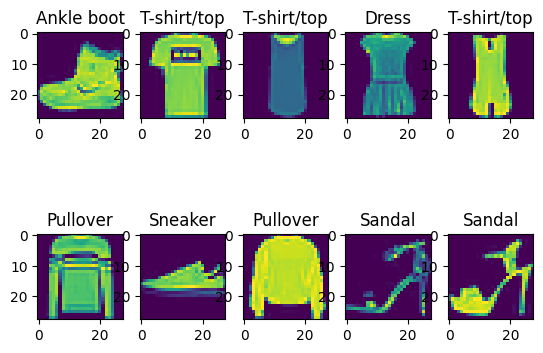

In [7]:
plt.imshow(imagens_treino[0])
plt.title(identificacoes_treino[0])
total_de_classificacoes = 10
nome_de_classificacoes =[
'T-shirt/top',
'Trouser',
'Pullover',
'Dress',
'Coat',
'Sandal',
'Shirt',
'Sneaker',
'Bag',
'Ankle boot'
]

for imagem in range(10):
  plt.subplot(2,5, imagem+1)
  plt.imshow(imagens_treino[imagem])
  plt.title(nome_de_classificacoes[identificacoes_treino[imagem]])


# Visualizando a imagem

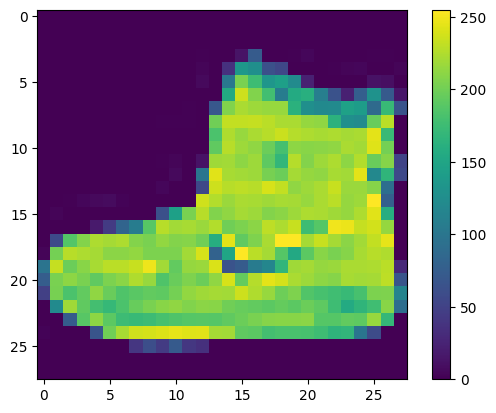

In [8]:
plt.imshow(imagens_treino[0])
plt.colorbar()

# Filtro sobel

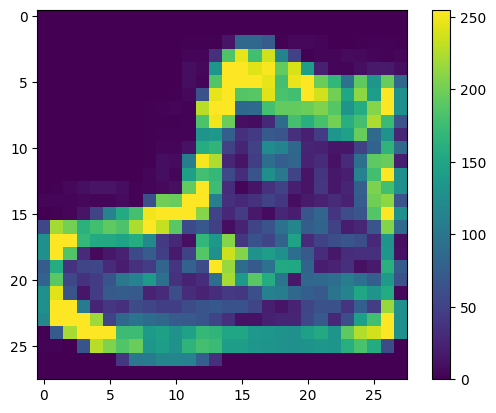

In [9]:
def apply_sobel(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    return cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

plt.imshow(apply_sobel(imagens_treino[0]))
plt.colorbar()

# Deep Learning
modelo
  entrada
  processamento
  saída


In [ ]:
imagens_treino = imagens_treino/float(255)

# Treinando modelo

In [ ]:
'''
modelo = Sequential([
    #entrada,
    Flatten(input_shape=(28,28)),
    #processamento,
    # Dense(512, activation=tensorflow.nn.relu),
    Dense(256, activation=tensorflow.nn.relu),
    Dropout(0.2),
    # Dense(128, activation=tensorflow.nn.relu),
    # Dense(64, activation=tensorflow.nn.relu),
    #saída
    Dense(10, activation=tensorflow.nn.softmax)
])
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=5, validation_split=0.2)

'''
modelo = Sequential()
modelo.add(Flatten(input_shape=(28,28)))
modelo.add(Dense(256, activation='relu'))
modelo.add(Dropout(0.2))
modelo.add(Dense(10, activation='softmax'))
modelo.compile(optimizer='adam',
               loss='sparse_categorical_crossentropy',
               metrics=['accuracy'])

modelo.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 256)                 │         200,960 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │           2,570 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 203,530 (795.04 KB)

 Trainable params: 203,530 (795.04 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
historico = modelo.fit(imagens_treino, identificacoes_treino, epochs=10, validation_split=0.2)

Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.7658 - loss: 0.6641 - val_accuracy: 0.8533 - val_loss: 0.4137
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8534 - loss: 0.4053 - val_accuracy: 0.8681 - val_loss: 0.3647
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8693 - loss: 0.3615 - val_accuracy: 0.8703 - val_loss: 0.3526
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8755 - loss: 0.3419 - val_accuracy: 0.8731 - val_loss: 0.3508
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8815 - loss: 0.3209 - val_accuracy: 0.8829 - val_loss: 0.3237
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 7ms/step - accuracy: 0.8856 - loss: 0.3048 - val_accuracy: 0.8813 - val_loss: 0.3277
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 7ms/step - accuracy: 0.8910 - loss: 0.2946 - val_accuracy: 0.8761 - val_loss: 0.3434
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.8930 - loss: 0.

In [ ]:
modelo.save('modelo_epochs5.keras')
modelo_salvo = load_model('modelo_epochs5.keras')

# validar objeto historico

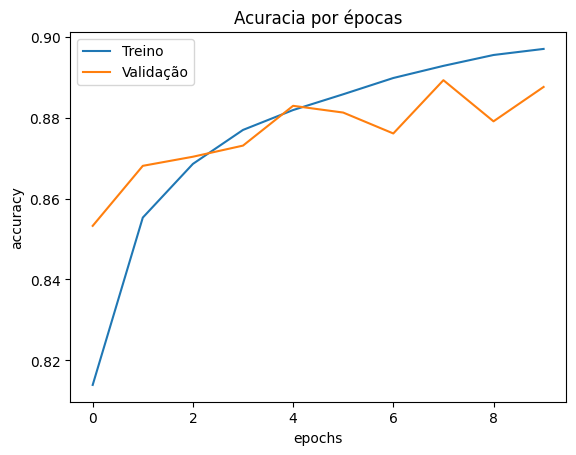

In [ ]:
plt.plot(historico.history['accuracy'])
plt.plot(historico.history['val_accuracy'])
plt.title('Acuracia por épocas')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['Treino','Validação'])

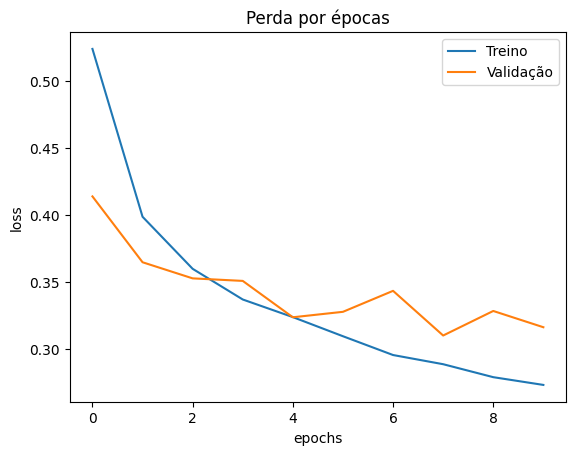

In [ ]:
plt.plot(historico.history['loss'])
plt.plot(historico.history['val_loss'])
plt.title('Perda por épocas')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend(['Treino','Validação'])

# Predições / Testes

In [ ]:
testes = modelo.predict(imagens_teste)

print('Resultado Teste: ',np.argmax(testes[0]))
print('Número da Imagem: ', identificacoes_teste[0])

total_imagens_diferentes = 0
for i in range (255):
  if (np.argmax(testes[i]) != identificacoes_teste[i]):
    total_imagens_diferentes += 1

print('Qtd. Diferentes: ', total_imagens_diferentes)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step
Resultado Teste:  9
Número da Imagem:  9
Qtd. Diferentes:  29


# Avaliação de Modelo

In [ ]:
perda_teste, acuracia_teste = modelo.evaluate(imagens_teste,identificacoes_teste)

print('Perda Teste: ',perda_teste)
print('Acuracia Teste: ',acuracia_teste)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8702 - loss: 61.3724
Perda Teste:  61.183067321777344
Acuracia Teste:  0.8705000281333923


In [14]:
def apply_canny(image):
    return cv2.Canny(image, 100, 200)

def apply_prewitt(image):
    kernelx = np.array([[1, 1, 1], [0, 0, 0], [-1, -1, -1]])
    kernely = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
    img_prewittx = cv2.filter2D(image, -1, kernelx)
    img_prewitty = cv2.filter2D(image, -1, kernely)
    return img_prewittx + img_prewitty

def apply_sobel(image):
    grad_x = cv2.Sobel(image, cv2.CV_64F, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_64F, 0, 1, ksize=3)
    abs_grad_x = cv2.convertScaleAbs(grad_x)
    abs_grad_y = cv2.convertScaleAbs(grad_y)
    return cv2.addWeighted(abs_grad_x, 0.5, abs_grad_y, 0.5, 0)

def augment_images(input_image_dir, input_label_dir, output_image_dir, output_label_dir, technique):
    if not os.path.exists(input_image_dir):
        print(f"O diretório de entrada das imagens {input_image_dir} não existe.")
        return
    if not os.path.exists(input_label_dir):
        print(f"O diretório de entrada dos labels {input_label_dir} não existe.")
        return
    if not os.path.exists(output_image_dir):
        os.makedirs(output_image_dir)
        print(f"O diretório de saída das imagens {output_image_dir} foi criado.")
    if not os.path.exists(output_label_dir):
        os.makedirs(output_label_dir)
        print(f"O diretório de saída dos labels {output_label_dir} foi criado.")

    image_paths = glob(os.path.join(input_image_dir, '*.jpg'))
    if not image_paths:
        print("Nenhuma imagem .jpg encontrada no diretório de entrada das imagens.")
        return

    for image_path in image_paths:
        try:
            image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
            if image is None:
                print(f"Não foi possível ler a imagem: {image_path}")
                continue

            base_name = os.path.basename(image_path)
            # Verificar se a imagem já foi processada com qualquer técnica
            if any(prefix in base_name for prefix in ['canny_', 'prewitt_', 'sobel_']):
                print(f">>> A imagem {base_name} já foi processada com alguma técnica.")
                continue

            if technique == 'canny':
                augmented_image = apply_canny(image)
            elif technique == 'prewitt':
                augmented_image = apply_prewitt(image)
            elif technique == 'sobel':
                augmented_image = apply_sobel(image)
            else:
                raise ValueError("Technique not recognized. Choose from 'canny', 'prewitt', or 'sobel'.")

            output_image_path = os.path.join(output_image_dir, f'{technique}_' + base_name)
            cv2.imwrite(output_image_path, augmented_image)
            print(f"Imagem processada salva em: {output_image_path}")

            # Construir o caminho do arquivo .txt correspondente
            txt_path = os.path.join(input_label_dir, os.path.splitext(base_name)[0] + '.txt')
            if os.path.exists(txt_path):
                # Construir o caminho de saída para o arquivo .txt
                output_txt_path = os.path.join(output_label_dir, f'{technique}_' + os.path.basename(txt_path))
                # Copiar o arquivo .txt para o diretório de saída
                shutil.copy(txt_path, output_txt_path)
                print(f"Arquivo .txt copiado para: {output_txt_path}")
            else:
                print(f"Arquivo .txt não encontrado para a imagem: {image_path}")

        except Exception as e:
            print(f"Erro ao processar a imagem {image_path}: {e}")

# Dataset train
input_image_directory = '/content/pesquisa/deteccao_arvores/yolo_v8/new_dataset/v6/dataset/train/images'
input_label_directory = '/content/pesquisa/deteccao_arvores/yolo_v8/new_dataset/v6/dataset/train/labels'
output_image_directory = '/content/pesquisa/deteccao_arvores/yolo_v8/new_dataset/v6/dataset/train/images'
output_label_directory = '/content/pesquisa/deteccao_arvores/yolo_v8/new_dataset/v6/dataset/train/labels'

# Dataset validation
# input_image_directory = 'C:\\Mestrado\\Materias\\pesquisa\\deteccao_arvores\\yolo_v8\\new_dataset\\v6\\dataset\\valid\\images'
# input_label_directory = 'C:\\Mestrado\\Materias\\pesquisa\\deteccao_arvores\\yolo_v8\\new_dataset\\v6\\dataset\\valid\\labels'
# output_image_directory = 'C:\\Mestrado\\Materias\\pesquisa\\deteccao_arvores\\yolo_v8\\new_dataset\\v6\\dataset\\valid\\images'
# output_label_directory = 'C:\\Mestrado\\Materias\\pesquisa\\deteccao_arvores\\yolo_v8\\new_dataset\\v6\\dataset\\valid\\labels'

# Aplicar técnica específica
# technique = 'prewitt'  # Pode ser 'canny', 'prewitt' ou 'sobel'
technique = 'sobel'  # Pode ser 'canny', 'prewitt' ou 'sobel'

augment_images(input_image_directory, input_label_directory, output_image_directory, output_label_directory, technique)



>>> A imagem canny_GH010014-006_2400.jpg já foi processada com alguma técnica.
>>> A imagem prewitt_GH010014-006_2400.jpg já foi processada com alguma técnica.
Imagem processada salva em: /content/pesquisa/deteccao_arvores/yolo_v8/new_dataset/v6/dataset/train/images/sobel_GH010014-006_2400.jpg
Arquivo .txt copiado para: /content/pesquisa/deteccao_arvores/yolo_v8/new_dataset/v6/dataset/train/labels/sobel_GH010014-006_2400.txt
